In [1]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf

In [2]:
def generate_ar_process(lags, coefs, length):
    
    #cast coefs to np array
    coefs = np.array(coefs)
    
    #initial values
    series = [np.random.normal() for _ in range(lags)]
    print(series)
    
    for _ in range(length):
        #get previous values of the series, reversed
        prev_vals = series[-lags:][::-1]
        
        #get new value of time series
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
        
        series.append(new_val)
        
    return np.array(series)

In [3]:
np.random.normal()

-1.279175744862971

In [4]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if(result[1]<0.05):
        print("is stationary")
    else:
        print("not stationary")

# AR(1) Process

## Stationary

[-0.8026736254262038]


Text(0.5, 1.0, 'Stationary AR(1) Process')

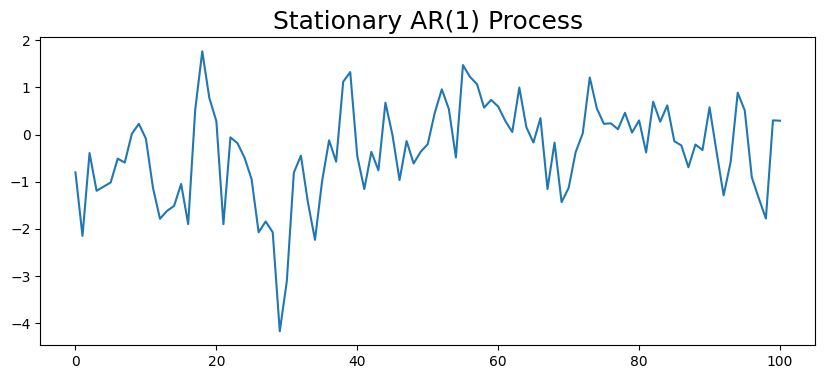

In [5]:
ar_1_process = generate_ar_process(1, [.5], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title('Stationary AR(1) Process', fontsize=18)

In [6]:
perform_adf_test(ar_1_process)

ADF Statistic: -5.049781
p-value: 0.000018
is stationary


## Non-Stationary

[-1.5284741985678352]


Text(0.5, 1.0, 'Non-Stationary AR(1) Process')

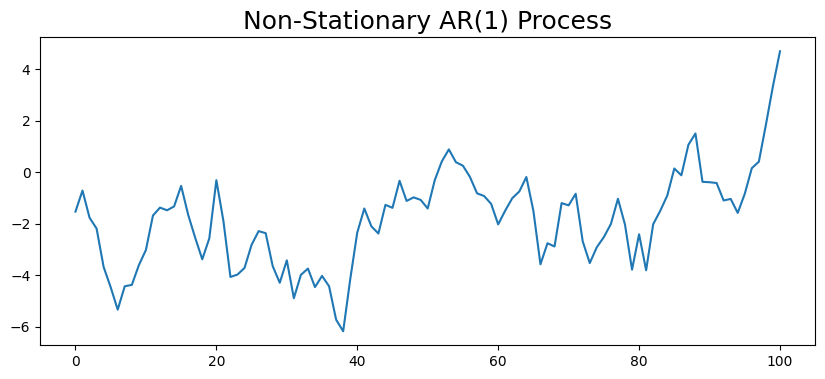

In [7]:
ar_1_process_unit_root = generate_ar_process(1, [1], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process_unit_root)
plt.title('Non-Stationary AR(1) Process', fontsize=18)

In [8]:
perform_adf_test(ar_1_process_unit_root)

ADF Statistic: -1.514909
p-value: 0.526124
not stationary


# AR(2) Process

## Stationary

[0.5484703937472715, 0.6004255369095824]


Text(0.5, 1.0, 'Stationary AR(2) Process')

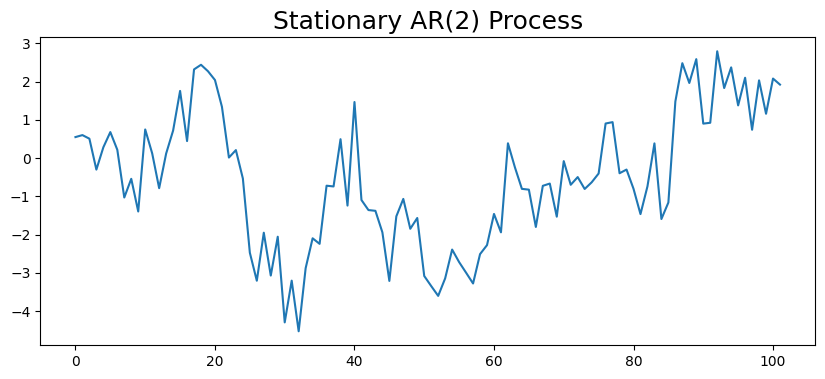

In [9]:
ar_2_process = generate_ar_process(2, [.5, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process)
plt.title('Stationary AR(2) Process', fontsize=18)

In [10]:
perform_adf_test(ar_2_process)

ADF Statistic: -2.016844
p-value: 0.279237
not stationary


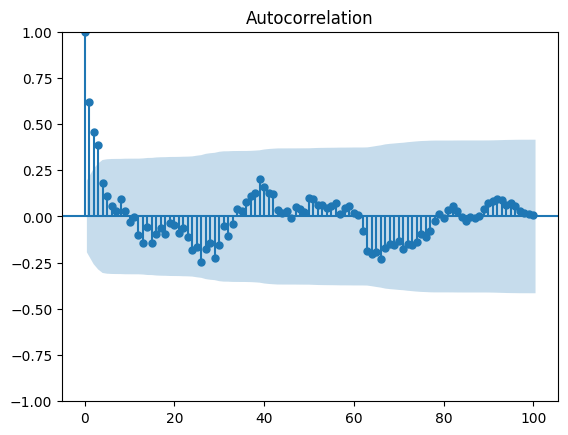

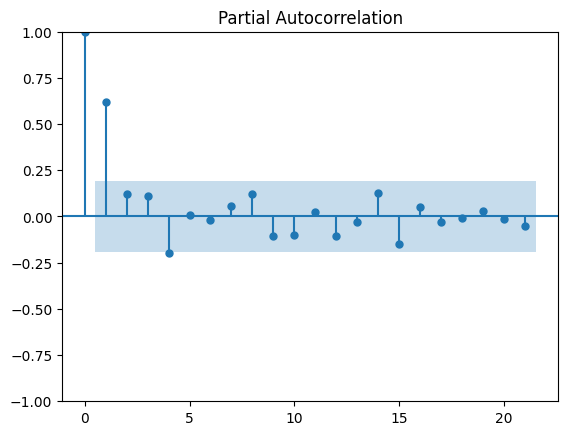

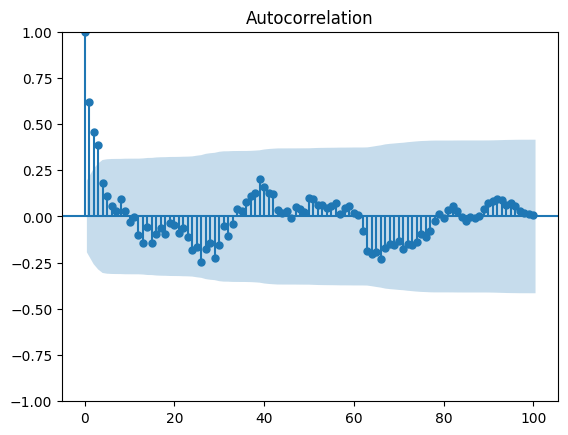

In [40]:
acf(ar_2_process)

plot_acf(ar_2_process,lags=100)

## Non-Stationary

[-1.7663262802539759, -0.4398631799593624]


Text(0.5, 1.0, 'Non-Stationary AR(2) Process')

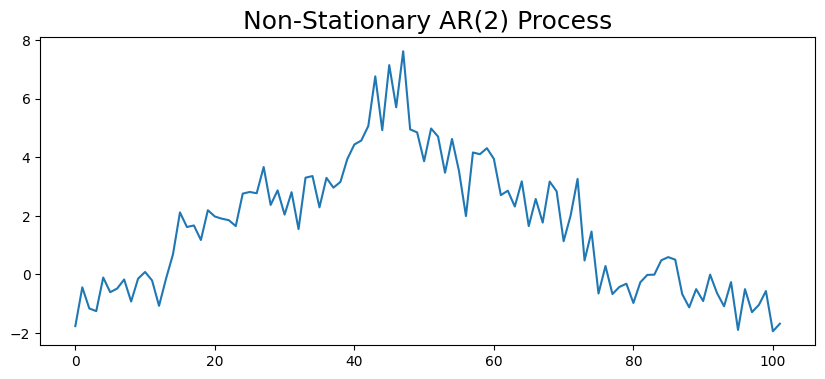

In [27]:
ar_2_process_unit_root = generate_ar_process(2, [.7, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process_unit_root)
plt.title('Non-Stationary AR(2) Process', fontsize=18)

In [32]:
perform_adf_test(ar_2_process_unit_root)

ADF Statistic: -1.069015
p-value: 0.727269
not stationary


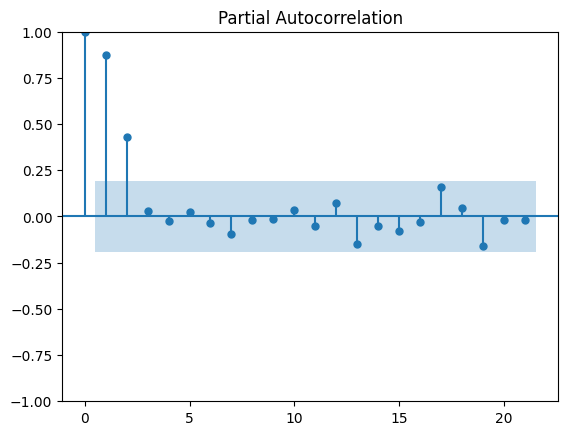

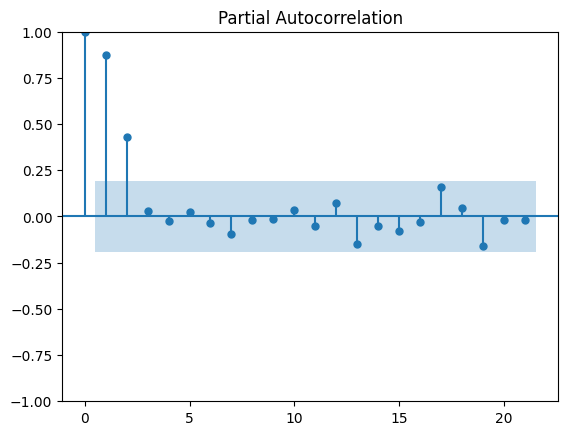

In [35]:
plot_pacf(ar_2_process_unit_root)